<a href="https://colab.research.google.com/github/raynajindal/Stock_Analysis/blob/main/NewsSentiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
finwiz_url = 'https://finviz.com/quote.ashx?t='

#stock_indexes = ['AMZN','TSLA', 'GOOG']
stock_indexes = ['AMZN']
news_info = []

for index in stock_indexes:
  
  index_url = finwiz_url + index
  req = Request(url=finwiz_url+index,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'})
  response = urlopen(req)

  news_html = BeautifulSoup(response)
  news_table = news_html.find(id='news-table')
  news_rows = news_table.findAll('tr')
  for row in news_rows:
    news_columns = row.findAll('td')
    if news_columns[1].a != None:
      date_time = news_columns[0].get_text().split()
      if len(date_time) > 1:
        date = date_time[0]
        time = date_time[1]
      else:
        time = date_time[0]
      news = news_columns[1].a.get_text()
      news_info.append([index,date,time,news])


In [ ]:
df = pd.DataFrame(news_info,columns = ['Stock','Date','Time','News'])

sid = SentimentIntensityAnalyzer()
df['score'] = df['News'].apply(sid.polarity_scores)

df['pos'] = df['score'].apply(lambda score_dict: score_dict['pos'])
df['neg'] = df['score'].apply(lambda score_dict: score_dict['neg'])
df['neu'] = df['score'].apply(lambda score_dict: score_dict['neu'])
df['sentiment_score'] = df['score'].apply(lambda score_dict: score_dict['compound'])


df.head()

,Stock,Date,Time,News,score,pos,neg,neu,sentiment_score
0,AMZN,Mar-09-23,08:00PM,Oscars 2023: Streaming Giants Take a Back Seat,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
1,AMZN,Mar-09-23,02:33PM,"Amazon, Alphabet, and Other Growth Stocks Appe...","{'neg': 0.0, 'neu': 0.544, 'pos': 0.456, 'comp...",0.456,0.000,0.544,0.6908
2,AMZN,Mar-09-23,10:00AM,Walmart Chips Away at Amazons Lead in a Key Ar...,"{'neg': 0.081, 'neu': 0.735, 'pos': 0.184, 'co...",0.184,0.081,0.735,0.3400
3,AMZN,Mar-09-23,09:50AM,A Bull Market Is Coming: 2 Reasons to Buy Amaz...,"{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'comp...",0.124,0.000,0.876,0.1779
4,AMZN,Mar-09-23,09:45AM,Better Buy: Amazon Stock vs. Disney Stock,"{'neg': 0.0, 'neu': 0.521, 'pos': 0.479, 'comp...",0.479,0.000,0.521,0.5574


<AxesSubplot:>

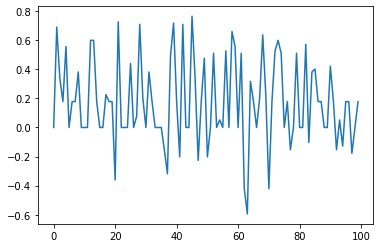

In [ ]:
df['sentiment_score'].plot()



Stock
AMZN    AxesSubplot(0.125,0.125;0.775x0.755)
Name: sentiment_score, dtype: object

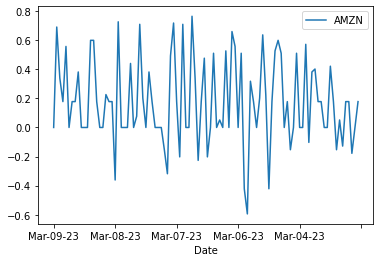

In [ ]:
df.set_index('Date', inplace=True)
df.groupby('Stock')['sentiment_score'].plot(legend=True)

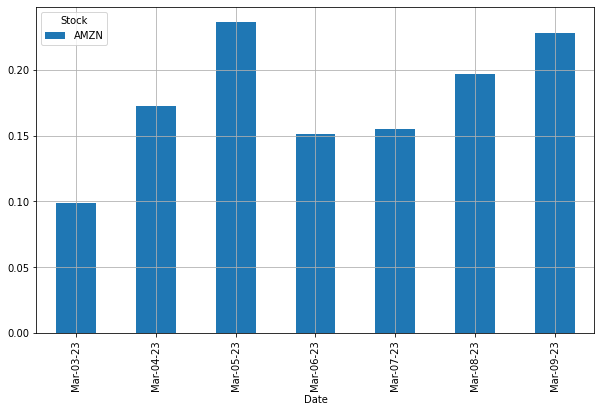

In [ ]:
plt.rcParams['figure.figsize'] = [10, 6]
# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = df.groupby(['Stock','Date']).mean()
# Unstack the column ticker
mean_scores = mean_scores.unstack()
# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('sentiment_score', axis="columns").transpose()
# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.9/140.9 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 4

In [1]:
import gradio as gr

with gr.Blocks() as demo:
  
  error_box = gr.Textbox(label="Error", visible=False)
  inputs=gr.Textbox(placeholder="Enter a stock symbol here...")
  submit_btn = gr.Button("Submit")
  
  with gr.Column(visible=False) as output_col:
    output_box=gr.Dataframe(headers=['Stock','Date','Time','News','score','pos','neg','neu','sentiment_score'])
    plot_graph = gr.Plot()

  def submit(stockname):
    finwiz_url = 'https://finviz.com/quote.ashx?t='
    index_url = finwiz_url + stockname
    req = Request(url=index_url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'})
    response = urlopen(req)
    news_html = BeautifulSoup(response)
    news_table = news_html.find(id='news-table')
    news_rows = news_table.findAll('tr')
    news_info = []
    for row in news_rows:
      news_columns = row.findAll('td')
      if news_columns[1].a != None:
        date_time = news_columns[0].get_text().split()
        if len(date_time) > 1:
          date = date_time[0]
          time = date_time[1]
        else:
          time = date_time[0]
        news = news_columns[1].a.get_text()
        news_info.append([stockname,date,time,news])
    df = pd.DataFrame(news_info,columns = ['Stock','Date','Time','News'])

    sid = SentimentIntensityAnalyzer()
    df['score'] = df['News'].apply(sid.polarity_scores)

    df['pos'] = df['score'].apply(lambda score_dict: score_dict['pos'])
    df['neg'] = df['score'].apply(lambda score_dict: score_dict['neg'])
    df['neu'] = df['score'].apply(lambda score_dict: score_dict['neu'])
    df['sentiment_score'] = df['score'].apply(lambda score_dict: score_dict['compound'])

    plt.rcParams['figure.figsize'] = [10, 6]
    # Group by date and ticker columns from scored_news and calculate the mean
    mean_scores = df.groupby(['Stock','Date']).mean()
    # Unstack the column ticker
    mean_scores = mean_scores.unstack()
    # Get the cross-section of compound in the 'columns' axis
    mean_scores = mean_scores.xs('sentiment_score', axis="columns").transpose()
    # Plot a bar chart with pandas

    mean_scores.plot(kind = 'bar')
    
    
    return {
      output_col: gr.update(visible=True),
      output_box: df.head(),
      plot_graph: plt
    }

  submit_btn.click(
      submit,
      [inputs],
      [error_box,output_box,plot_graph,output_col],
  )

demo.launch()

ModuleNotFoundError: ignored

In [ ]:
import gradio

gradio.close_all()